# Task 1: Creating a neural network
Create a simple neural network in Python using TensorFlow or any other machine learning
framework. The network must be capable of classifying images from the MNIST dataset.

In [1]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data
In this notebook, we will be working with mnist data set: https://en.wikipedia.org/wiki/MNIST_database

60,000 train images

10,000 test images

image size (28,28)

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
type(x_test)

numpy.ndarray

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

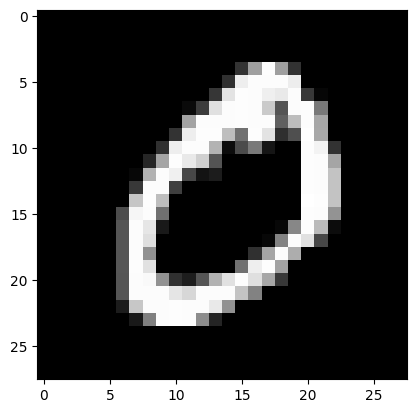

In [8]:
plt.imshow(x_train[1], cmap='gray')  # Display the array as a grayscale image
plt.show()  # Display the figure

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Convolutional Neural Networks (CNN)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
# reshaping
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

# Creating a CNN model:

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy', # Multi-class classification (orders, no one-hot encoding)
                  metrics=['accuracy'])

    return model

In [17]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [18]:
# params
1*(3*3)*32 + 32

320

In [19]:
32*(3*3)*64+64

18496

In [20]:
64*(3*3)*128+128

73856

In [21]:
3*3*128

1152

In [22]:
1152*64+64

73792

In [23]:
64*10+10

650

In [24]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

# Fit this Model

In [25]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="first_CNN.h5",save_best_only=True, monitor="val_loss")

In [26]:
history = model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          epochs=10, batch_size=64, callbacks=[modelcheckpoint])

Epoch 1/10
938/938 [==============================] - 59s 62ms/step - loss: 0.1644 - accuracy: 0.9484 - val_loss: 0.0560 - val_accuracy: 0.9839
Epoch 2/10
  3/938 [..............................] - ETA: 44s - loss: 0.0638 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 57s 61ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 4/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0246 - val_accuracy: 0.9916
Epoch 5/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.0304 - val_accuracy: 0.9914
Epoch 6/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 7/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0348 - val_accuracy: 0.9921
Epoch 8/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0304 - val_accuracy: 0.9922
Epo

In [27]:
60000/64

937.5

In [28]:
test_model = keras.models.load_model("first_CNN.h5")
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0246 - accuracy: 0.9916


[0.024573173373937607, 0.991599977016449]

As we can see, this simple CNN performs really well in the test set with +99% accuracy.

# Model evaluation

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
metrics = pd.DataFrame(history.history)

In [31]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.164448,0.948367,0.056003,0.9839
1,0.043754,0.986133,0.034244,0.9886
2,0.028617,0.991383,0.033405,0.9890
3,0.021606,0.993317,0.024573,0.9916
4,0.016256,0.995183,0.030410,0.9914


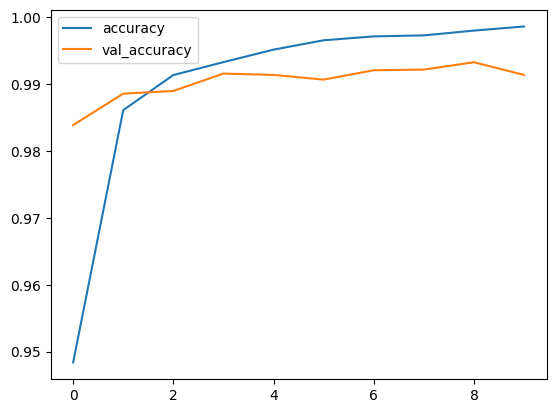

In [32]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

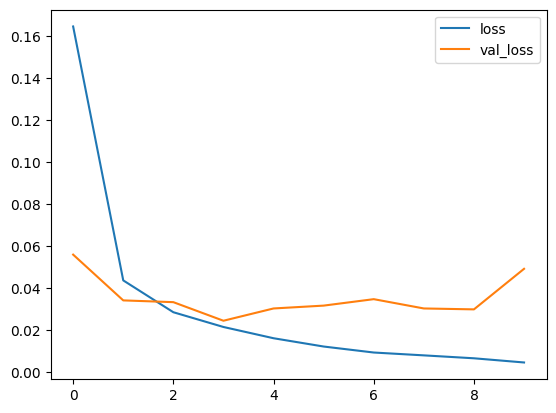

In [33]:
metrics[['loss','val_loss']].plot()
plt.show()

In [34]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 [==============================] - 5s 14ms/step


array([6.1230697e-18, 1.1878017e-14, 6.8473546e-15, 1.3863383e-11,
       3.0150104e-15, 6.5498556e-17, 1.5308036e-22, 9.9999994e-01,
       1.1860494e-14, 1.4097110e-13], dtype=float32)

In [35]:
predictions_prob.shape

(10000, 10)

In [36]:
y_test[0]

7

let's generate prediction classes:



*   For binary classification, np.where(y_pred > threshold, 1,0)
*   For multiclass classification, np.argmax(predictions, axis=1)




In [37]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([7, 2, 1, 0, 4])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    1,    0,    0,    1,    1,    0],
       [   0, 1131,    3,    0,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1024,    0,    2,    0,    0,    3,    2,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    1,    0,    4,    0,  884,    1,    0,    2,    0],
       [   4,    2,    0,    0,    2,    0,  948,    0,    2,    0],
       [   0,    3,    1,    1,    1,    0,    0, 1019,    1,    2],
       [   0,    0,    2,    0,    0,    1,    0,    1,  969,    1],
       [   0,    1,    0,    0,   27,    2,    0,    1,    3,  975]])

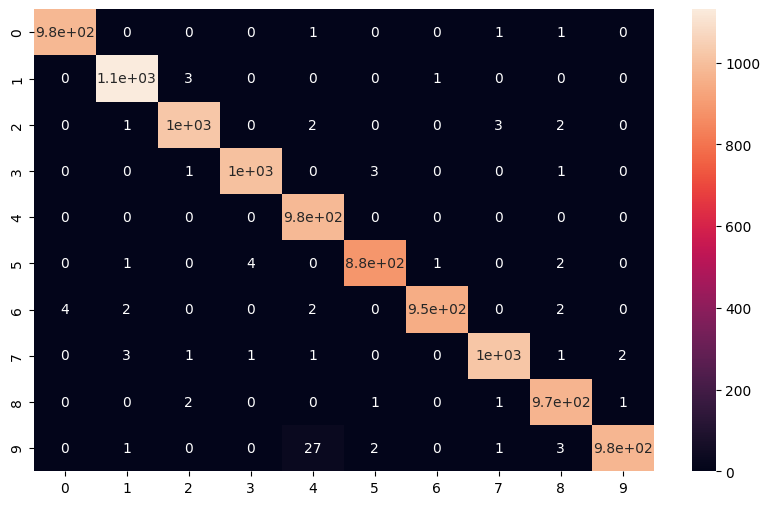

In [41]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

In [42]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [43]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[62, 92, 264, 340, 359, 445, 449, 583, 625]

In [44]:
x_test[0].shape

(28, 28, 1)

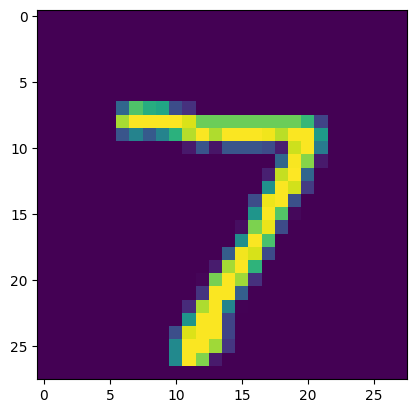

In [45]:
 plt.imshow(x_test[0].reshape(28,28))

In [46]:
for a, b in enumerate(misclassified_images[:9]):
  print (a, b)

0 62
1 92
2 264
3 340
4 359
5 445
6 449
7 583
8 625


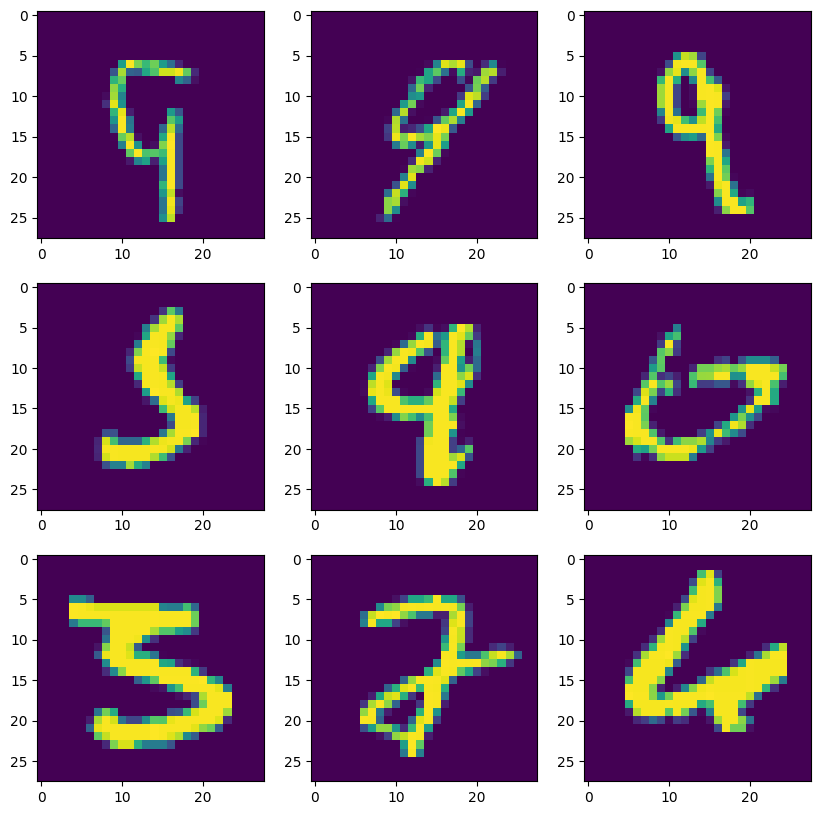

In [47]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [48]:
actuals

[9, 9, 9, 5, 9, 6, 3, 2, 6]

In [49]:
predictions[misclassified_images[:9]]

array([5, 4, 4, 3, 4, 0, 5, 7, 4])